# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
  # Load the raw CIFAR-10 data
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # Subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]

  return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

/home/amit/Desktop/AmitProjects/SDCND/CS231n/CS231n_Assignments/assignment1/cs231n/features.py:118: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  orientation_histogram[:,:,i] = uniform_filter(temp_mag, size=(cx, cy))[cx/2::cx, cy/2::cy].T


Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [ ]:
X_train_feats.shape

In [ ]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################

# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of about 0.4 on the validation set.
learning_rates = [1e-7, 1e-5] #[1e-9, 1e-8, 1e-7]
regularization_strengths = [1e2, 1e5] #[1e5, 1e6, 1e7]

import math
#math.log10(1e-5/1e-7)/math.log10(3)

list_lr = []
num_lr=3
start_lr = learning_rates[0]
stop_lr = learning_rates[1]
base_lr = 10**(math.log10(stop_lr/start_lr)/num_lr)
range_lr = range(0,num_lr+1,1)
for i in range_lr:
    list_lr.append(start_lr*base_lr**i)
    #print(start_lr*base_lr**i)
    
list_reg = []
num_reg=3
start_reg = regularization_strengths[0]
stop_reg = regularization_strengths[1]
base_reg = 10**(math.log10(stop_reg/start_reg)/num_reg)
range_reg = range(0,num_reg+1,1)
for i in range_reg:
    list_reg.append(start_reg*base_reg**i)
    #print(start_reg*base_reg**i)

print(list_lr)
print()
print(list_reg)


# results is dictionary mapping tuples of the form
# (learning_rate, regularization_strength) to tuples of the form
# (training_accuracy, validation_accuracy). The accuracy is simply the fraction
# of data points that are correctly classified.
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
best_svm = None # The LinearSVM object that achieved the highest validation rate.

In [ ]:
################################################################################
# TODO:                                                                        #
# Write code that chooses the best hyperparameters by tuning on the validation #
# set. For each combination of hyperparameters, train a linear SVM on the      #
# training set, compute its accuracy on the training and validation sets, and  #
# store these numbers in the results dictionary. In addition, store the best   #
# validation accuracy in best_val and the LinearSVM object that achieves this  #
# accuracy in best_svm.                                                        #
#                                                                              #
# Hint: You should use a small value for num_iters as you develop your         #
# validation code so that the SVMs don't take much time to train; once you are #
# confident that your validation code works, you should rerun the validation   #
# code with a larger value for num_iters.                                      #
################################################################################
for ii in list_lr:
    for jj in list_reg:
        svm = LinearSVM() #need to initialize this every time
        loss_hist = svm.train(X_train_feats, y_train, learning_rate=ii, reg=jj,
                          num_iters=600, verbose=False)
        y_train_pred = svm.predict(X_train_feats)
        y_train_acc = np.mean(y_train == y_train_pred)
        y_val_pred = svm.predict(X_val_feats)
        y_val_acc = np.mean(y_val == y_val_pred)

        results[(ii,jj)] = (y_train_acc,y_val_acc)
    
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
    
# Print out results.
best_hyper = [0,0] #initialize
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    if val_accuracy > best_val: 
        best_val=val_accuracy
        best_hyper[0] = lr
        best_hyper[1] = reg
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

In [ ]:
#print(results)
print(best_hyper)

best_svm = LinearSVM() #need to initialize this every time
loss_hist = best_svm.train(X_train_feats, y_train, learning_rate=best_hyper[0], reg=best_hyper[1], 
                           num_iters=1500, verbose=True)
y_train_pred = best_svm.predict(X_train_feats)
y_train_acc = np.mean(y_train == y_train_pred)
y_val_pred = best_svm.predict(X_val_feats)
y_val_acc = np.mean(y_val == y_val_pred)
print(y_val_acc)

In [ ]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

In [ ]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [25]:
print(X_train.shape)
print(X_train_feats.shape)

(49000, 32, 32, 3)
(49000, 155)


In [42]:
################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of about 0.4 on the validation set.
learning_rates = [0.1, 1]
regularization_strengths = [0.001, 0.5]

import math
#math.log10(1e-5/1e-7)/math.log10(3)

list_lr = []
num_lr=2
start_lr = learning_rates[0]
stop_lr = learning_rates[1]
base_lr = 10**(math.log10(stop_lr/start_lr)/num_lr)
range_lr = range(0,num_lr+1,1)
for i in range_lr:
    list_lr.append(start_lr*base_lr**i)
    #print(start_lr*base_lr**i)
    
list_reg = []
num_reg=2
start_reg = regularization_strengths[0]
stop_reg = regularization_strengths[1]
base_reg = 10**(math.log10(stop_reg/start_reg)/num_reg)
range_reg = range(0,num_reg+1,1)
for i in range_reg:
    list_reg.append(start_reg*base_reg**i)
    #print(start_reg*base_reg**i)

print(list_lr)
print()
print(list_reg)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

[0.1, 0.316227766016838, 1.0000000000000002]

[0.001, 0.022360679774997894, 0.4999999999999999]


In [43]:
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

results = {}
best_val = -1
best_net = None # store the best model into this 

net = TwoLayerNet(input_dim, hidden_dim, num_classes)

################################################################################
for lr in list_lr:
    for reg in list_reg:
        
        net = TwoLayerNet(input_dim, hidden_dim, num_classes)
        # Train the network
        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                    num_iters=1000, batch_size=200,
                    learning_rate=lr, learning_rate_decay=0.95,
                    reg=reg, verbose=False)

        # Predict on the validation set
        y_val_acc = (net.predict(X_val_feats) == y_val).mean()
        print('lr %f reg %f: Validation accuracy %f' % (lr,reg,y_val_acc))

        results[(lr,reg)] = y_val_acc
    
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
    
# Print out results.
best_hyper = [0,0] #initialize
for lr, reg in sorted(results):
    val_accuracy = results[(lr, reg)]
    if val_accuracy > best_val: 
        best_val=val_accuracy
        best_hyper[0] = lr
        best_hyper[1] = reg
    print('lr %e reg %e val accuracy: %f' % (
                lr, reg, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 0.100000 reg 0.001000: Validation accuracy 0.517000
lr 0.100000 reg 0.022361: Validation accuracy 0.501000
lr 0.100000 reg 0.500000: Validation accuracy 0.079000
lr 0.316228 reg 0.001000: Validation accuracy 0.567000
lr 0.316228 reg 0.022361: Validation accuracy 0.497000
lr 0.316228 reg 0.500000: Validation accuracy 0.079000
lr 1.000000 reg 0.001000: Validation accuracy 0.563000
lr 1.000000 reg 0.022361: Validation accuracy 0.510000
lr 1.000000 reg 0.500000: Validation accuracy 0.143000
lr 1.000000e-01 reg 1.000000e-03 val accuracy: 0.517000
lr 1.000000e-01 reg 2.236068e-02 val accuracy: 0.501000
lr 1.000000e-01 reg 5.000000e-01 val accuracy: 0.079000
lr 3.162278e-01 reg 1.000000e-03 val accuracy: 0.567000
lr 3.162278e-01 reg 2.236068e-02 val accuracy: 0.497000
lr 3.162278e-01 reg 5.000000e-01 val accuracy: 0.079000
lr 1.000000e+00 reg 1.000000e-03 val accuracy: 0.563000
lr 1.000000e+00 reg 2.236068e-02 val accuracy: 0.510000
lr 1.000000e+00 reg 5.000000e-01 val accuracy: 0.143000
b

In [44]:
print(best_hyper)
lr = best_hyper[0]
reg = best_hyper[1]

best_net = TwoLayerNet(input_dim, hidden_dim, num_classes)
# Train the network
stats = best_net.train(X_train_feats, y_train, X_val_feats, y_val,
                  num_iters=3000, batch_size=200,
                  learning_rate=lr, learning_rate_decay=0.95,
                  reg=reg, verbose=True)

# Predict on the validation set
y_val_acc = (best_net.predict(X_val_feats) == y_val).mean()
print('Validation accuracy %f' % (y_val_acc))

[0.316227766016838, 0.001]
iteration 0 / 3000: loss 2.302585
iteration 100 / 3000: loss 1.799641
iteration 200 / 3000: loss 1.517108
iteration 300 / 3000: loss 1.378338
iteration 400 / 3000: loss 1.382066
iteration 500 / 3000: loss 1.401007
iteration 600 / 3000: loss 1.250727
iteration 700 / 3000: loss 1.331833
iteration 800 / 3000: loss 1.263542
iteration 900 / 3000: loss 1.248961
iteration 1000 / 3000: loss 1.206504
iteration 1100 / 3000: loss 1.056115
iteration 1200 / 3000: loss 1.101764
iteration 1300 / 3000: loss 1.128171
iteration 1400 / 3000: loss 1.064441
iteration 1500 / 3000: loss 1.107104
iteration 1600 / 3000: loss 1.033494
iteration 1700 / 3000: loss 1.061394
iteration 1800 / 3000: loss 1.045383
iteration 1900 / 3000: loss 1.066272
iteration 2000 / 3000: loss 1.013736
iteration 2100 / 3000: loss 1.008400
iteration 2200 / 3000: loss 1.183624
iteration 2300 / 3000: loss 1.020897
iteration 2400 / 3000: loss 0.998006
iteration 2500 / 3000: loss 0.968503
iteration 2600 / 3000: 

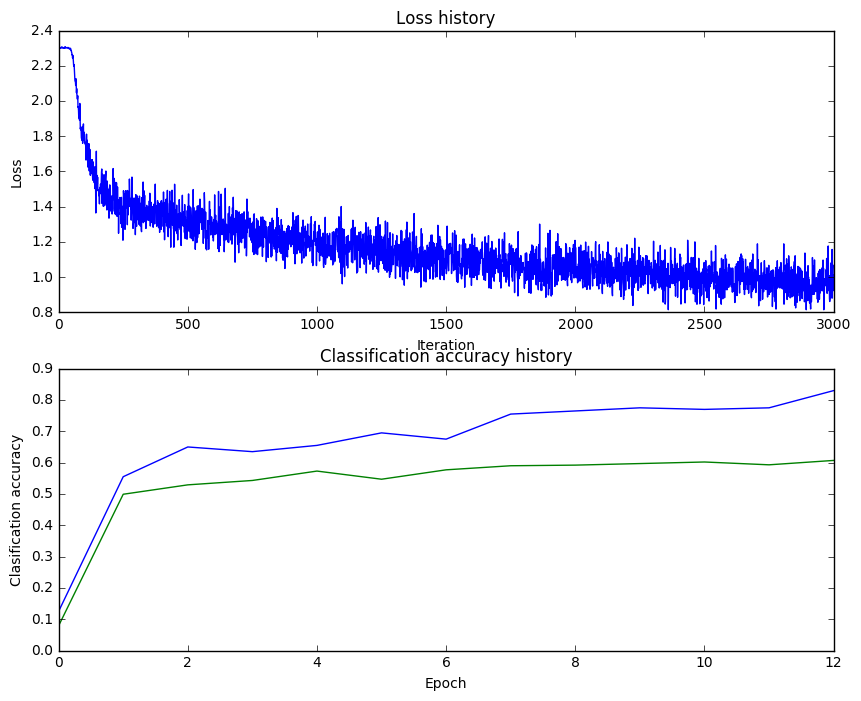

In [45]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

In [46]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.594


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!